<a href="https://colab.research.google.com/github/Lafri-13/Analysing-Tropospheric-Formaldehyde-HCHO-gas-in-Sri-Lanka/blob/main/Analysis_HCHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading libraries and Datasets

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df_col_mat_nuw = pd.read_csv('/content/drive/MyDrive/CM2606-CW-Datasets/col_mat_nuw_output.csv')
df_kan = pd.read_csv('/content/drive/MyDrive/CM2606-CW-Datasets/kan_output.csv')
df_mon_kur_jaf = pd.read_csv('/content/drive/MyDrive/CM2606-CW-Datasets/mon_kur_jaf_output.csv')

# **1. Data Preprocessing**

## Descriptive analysis

In [79]:
print(df_col_mat_nuw.shape)
df_col_mat_nuw.info()

(5477, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   0.00019698343957810148  3058 non-null   float64
 1   Colombo Proper          5477 non-null   object 
 2   2019-01-01              5477 non-null   object 
 3   2019-01-02              5477 non-null   object 
dtypes: float64(1), object(3)
memory usage: 171.3+ KB


In [80]:
df_col_mat_nuw["Colombo Proper"].unique()

array(['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper'],
      dtype=object)

In [81]:
print(df_kan.shape)
df_kan.info()

(1825, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   0.00017607134598773356  1032 non-null   float64
 1   Kandy Proper            1825 non-null   object 
 2   2019-01-01              1825 non-null   object 
 3   2019-01-02              1825 non-null   object 
dtypes: float64(1), object(3)
memory usage: 57.2+ KB


In [82]:
df_kan["Kandy Proper"].unique()

array(['Kandy Proper'], dtype=object)

In [83]:
print(df_mon_kur_jaf.shape)
df_mon_kur_jaf.info()

(5477, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3826 non-null   float64
 1   Bibile, Monaragala  5477 non-null   object 
 2   2019-01-01          5477 non-null   object 
 3   2019-01-02          5477 non-null   object 
dtypes: float64(1), object(3)
memory usage: 171.3+ KB


In [84]:
df_mon_kur_jaf["Bibile, Monaragala"].unique()

array(['Bibile, Monaragala', 'Kurunegala Proper', 'Jaffna Proper'],
      dtype=object)

In [85]:
df_col_mat_nuw.head()

,0.00019698343957810148,Colombo Proper,2019-01-01,2019-01-02
0,0.000263,Colombo Proper,2019-01-02,2019-01-03
1,0.000099,Colombo Proper,2019-01-03,2019-01-04
2,0.000210,Colombo Proper,2019-01-04,2019-01-05
3,0.000179,Colombo Proper,2019-01-05,2019-01-06
4,0.000108,Colombo Proper,2019-01-06,2019-01-07


In [86]:
df_kan.head()

,0.00017607134598773356,Kandy Proper,2019-01-01,2019-01-02
0,0.000092,Kandy Proper,2019-01-02,2019-01-03
1,NaN,Kandy Proper,2019-01-03,2019-01-04
2,0.000191,Kandy Proper,2019-01-04,2019-01-05
3,0.000122,Kandy Proper,2019-01-05,2019-01-06
4,-0.000065,Kandy Proper,2019-01-06,2019-01-07


In [87]:
df_mon_kur_jaf.head()

,Unnamed: 0,"Bibile, Monaragala",2019-01-01,2019-01-02
0,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
1,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
2,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
3,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06
4,0.000146,"Bibile, Monaragala",2019-01-06,2019-01-07


In [88]:
df_col_mat_nuw.describe().T

,count,mean,std,min,25%,50%,75%,max
0.00019698343957810148,3058.0,0.00012,0.000101,-0.000259,0.000053,0.000111,0.000176,0.0009


In [89]:
df_kan.describe().T

,count,mean,std,min,25%,50%,75%,max
0.00017607134598773356,1032.0,0.000106,0.000092,-0.0003,0.00005,0.000106,0.000161,0.000705


In [90]:
df_mon_kur_jaf.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3826.0,0.000122,0.000087,-0.000352,0.000068,0.000114,0.000172,0.000584


In [91]:
df_col_mat_nuw.isnull().sum()

0.00019698343957810148    2419
Colombo Proper               0
2019-01-01                   0
2019-01-02                   0
dtype: int64

In [92]:
df_kan.isnull().sum()

0.00017607134598773356    793
Kandy Proper                0
2019-01-01                  0
2019-01-02                  0
dtype: int64

In [93]:
df_mon_kur_jaf.isnull().sum()

Unnamed: 0            1651
Bibile, Monaragala       0
2019-01-01               0
2019-01-02               0
dtype: int64

In [94]:
df_col_mat_nuw.duplicated().sum()

0

In [95]:
df_kan.duplicated().sum()

0

In [96]:
df_mon_kur_jaf.duplicated().sum()

0

### Observations


1. No column Names.
2. Column data points and  data types are same for all three datasets.
3. Date is not in the datatime data type.
4. Null values are there.
5. No duplicates found.

## Adding column names and merging all three datasets to do the data analysis

In [97]:
# naming the columns
df_col_mat_nuw.columns = ['HCHO_reading', 'Location', 'Current_Date', 'Next_Date']
df_col_mat_nuw.head()

,HCHO_reading,Location,Current_Date,Next_Date
0,0.000263,Colombo Proper,2019-01-02,2019-01-03
1,0.000099,Colombo Proper,2019-01-03,2019-01-04
2,0.000210,Colombo Proper,2019-01-04,2019-01-05
3,0.000179,Colombo Proper,2019-01-05,2019-01-06
4,0.000108,Colombo Proper,2019-01-06,2019-01-07


In [98]:
# naming the columns
df_kan.columns = ['HCHO_reading', 'Location', 'Current_Date', 'Next_Date']
df_kan.head()

,HCHO_reading,Location,Current_Date,Next_Date
0,0.000092,Kandy Proper,2019-01-02,2019-01-03
1,NaN,Kandy Proper,2019-01-03,2019-01-04
2,0.000191,Kandy Proper,2019-01-04,2019-01-05
3,0.000122,Kandy Proper,2019-01-05,2019-01-06
4,-0.000065,Kandy Proper,2019-01-06,2019-01-07


In [99]:
# naming the columns
df_mon_kur_jaf.columns = ['HCHO_reading', 'Location', 'Current_Date', 'Next_Date']
df_mon_kur_jaf.head()

,HCHO_reading,Location,Current_Date,Next_Date
0,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
1,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
2,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
3,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06
4,0.000146,"Bibile, Monaragala",2019-01-06,2019-01-07


In [100]:
# Merging all datasets
df_sl_cities = pd.concat([df_col_mat_nuw, df_kan, df_mon_kur_jaf], axis=0)
df_sl_cities.shape

(12779, 4)

In [101]:
# changing the Dates to datetime from int
df_sl_cities['Current_Date'] = pd.to_datetime(df_sl_cities['Current_Date'])
df_sl_cities['Next_Date'] = pd.to_datetime(df_sl_cities['Next_Date'])
df_sl_cities.head()

,HCHO_reading,Location,Current_Date,Next_Date
0,0.000263,Colombo Proper,2019-01-02,2019-01-03
1,0.000099,Colombo Proper,2019-01-03,2019-01-04
2,0.000210,Colombo Proper,2019-01-04,2019-01-05
3,0.000179,Colombo Proper,2019-01-05,2019-01-06
4,0.000108,Colombo Proper,2019-01-06,2019-01-07


In [102]:
df_sl_cities.isnull().sum()

HCHO_reading    4863
Location           0
Current_Date       0
Next_Date          0
dtype: int64

In [103]:
df_sl_cities_groups = df_sl_cities.groupby("Location")

Interpolate is used in a  dataset with Time series .So used interpolate in the same city group because other cities can have a lot more different HCHO values.

In [104]:
# Reset Index before handling the null value
df_sl_cities.reset_index(drop=True, inplace=True)

# useing interpolate
df_sl_cities['HCHO_reading'] = df_sl_cities_groups['HCHO_reading'].transform(lambda x: x.interpolate(method='linear'))

print('____________________________________________________________')

df_sl_cities.isnull().sum()

____________________________________________________________


HCHO_reading    3
Location        0
Current_Date    0
Next_Date       0
dtype: int64

Forward fill to remaining null values

In [105]:
df_sl_cities['HCHO_reading'] = df_sl_cities['HCHO_reading'].fillna(method='ffill')
df_sl_cities.isnull().sum()

HCHO_reading    0
Location        0
Current_Date    0
Next_Date       0
dtype: int64

In [106]:
df_sl_cities["Current_Date"].describe()

count                            12779
mean     2021-07-01 17:08:28.490492416
min                2019-01-01 00:00:00
25%                2020-04-01 00:00:00
50%                2021-07-02 00:00:00
75%                2022-10-01 00:00:00
max                2023-12-31 00:00:00
Name: Current_Date, dtype: object

In [107]:
df_sl_cities["Next_Date"].describe()

count                            12779
mean     2021-07-02 17:08:28.490492416
min                2019-01-02 00:00:00
25%                2020-04-02 00:00:00
50%                2021-07-03 00:00:00
75%                2022-10-02 00:00:00
max                2024-01-01 00:00:00
Name: Next_Date, dtype: object

In [108]:
df_sl_cities["HCHO_reading"].describe()

count    12779.000000
mean         0.000111
std          0.000088
min         -0.000352
25%          0.000056
50%          0.000103
75%          0.000161
max          0.000900
Name: HCHO_reading, dtype: float64

## Statistical Analysis

Only the HCHO reading got a float value

In [109]:
# Finding the median
print("----- Median ------")
df_sl_cities["HCHO_reading"].median()

----- Median ------


0.0001033480740311

In [110]:
max_reading = df_sl_cities["HCHO_reading"].max()
min_reading = df_sl_cities["HCHO_reading"].min()
range = max_reading - min_reading
print("Max = ", max_reading)
print("Min = ", min_reading)
print("----- Range of HCHO Reading ------")
print(range)

Max =  0.0008997101837438
Min =  -0.0003524730243572
----- Range of HCHO Reading ------
0.001252183208101


In [111]:
print("----- Median of HCHO Reading for each city ------")
df_sl_cities_groups["HCHO_reading"].median()

----- Median of HCHO Reading for each city ------


Location
Bibile, Monaragala     0.000116
Colombo Proper         0.000144
Deniyaya, Matara       0.000082
Jaffna Proper          0.000099
Kandy Proper           0.000095
Kurunegala Proper      0.000115
Nuwara Eliya Proper    0.000076
Name: HCHO_reading, dtype: float64

In [112]:
range_group = df_sl_cities_groups['HCHO_reading'].max() - df_sl_cities_groups['HCHO_reading'].min()
print("----- Range of HCHO Reading for each city ------")
range_group

----- Range of HCHO Reading for each city ------


Location
Bibile, Monaragala     0.000774
Colombo Proper         0.000879
Deniyaya, Matara       0.001159
Jaffna Proper          0.000936
Kandy Proper           0.001005
Kurunegala Proper      0.000660
Nuwara Eliya Proper    0.000598
Name: HCHO_reading, dtype: float64

In [113]:
# Statistic of each city
print("------ Statistic of of HCHO Reading for each city ------")
df_sl_cities_groups['HCHO_reading'].describe()

------ Statistic of of HCHO Reading for each city ------


,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
"Bibile, Monaragala",1825.0,0.000120,0.000089,-0.000239,0.000061,0.000116,0.000176,0.000535
Colombo Proper,1825.0,0.000154,0.000095,-0.000229,0.000092,0.000144,0.000212,0.000650
"Deniyaya, Matara",1826.0,0.000093,0.000091,-0.000259,0.000037,0.000082,0.000137,0.000900
Jaffna Proper,1826.0,0.000107,0.000077,-0.000352,0.000061,0.000099,0.000144,0.000584
Kandy Proper,1825.0,0.000099,0.000086,-0.000300,0.000047,0.000095,0.000148,0.000705
Kurunegala Proper,1826.0,0.000124,0.000083,-0.000157,0.000071,0.000115,0.000173,0.000503
Nuwara Eliya Proper,1826.0,0.000082,0.000074,-0.000179,0.000034,0.000076,0.000126,0.000419


In [114]:
df_sl_cities_groups.corr()

HCHO_reading  Current_Date  Next_Date
Location                                                               
Bibile, Monaragala  HCHO_reading      1.000000      0.025041   0.025041
                    Current_Date      0.025041      1.000000   1.000000
                    Next_Date         0.025041      1.000000   1.000000
Colombo Proper      HCHO_reading      1.000000     -0.071740  -0.071740
                    Current_Date     -0.071740      1.000000   1.000000
                    Next_Date        -0.071740      1.000000   1.000000
Deniyaya, Matara    HCHO_reading      1.000000     -0.043073  -0.043073
                    Current_Date     -0.043073      1.000000   1.000000
                    Next_Date        -0.043073      1.000000   1.000000
Jaffna Proper       HCHO_reading      1.000000     -0.024314  -0.024314
                    Current_Date     -0.024314      1.000000   1.000000
                    Next_Date        -0.024314      1.000000   1.000000
Kandy Proper        HCHO_reading      1.000000     -0.060307  -0.060307
                    Current_Date     -0.060307      1.000000   1.000000
                    Next_Date        -0.060307      1.000000   1.000000
Kurunegala Proper   HCHO_reading      1.000000     -0.075042  -0.075042
                    Current_Date     -0.075042      1.000000   1.000000
                    Next_Date        -0.075042      1.000000   1.000000
Nuwara Eliya Proper HCHO_reading      1.000000     -0.032183  -0.032183
                    Current_Date     -0.032183      1.000000   1.000000
                    Next_Date        -0.032183      1.000000   1.000000

In [115]:
df_sl_cities_groups.cov()

HCHO_reading  Current_Date     Next_Date
Location                                                                  
Bibile, Monaragala  HCHO_reading  7.994401e-09  1.019428e+11  1.019428e+11
                    Current_Date  1.019428e+11  2.073050e+33  2.073050e+33
                    Next_Date     1.019428e+11  2.073050e+33  2.073050e+33
Colombo Proper      HCHO_reading  8.930708e-09 -3.086813e+11 -3.086813e+11
                    Current_Date -3.086813e+11  2.073050e+33  2.073050e+33
                    Next_Date    -3.086813e+11  2.073050e+33  2.073050e+33
Deniyaya, Matara    HCHO_reading  8.301395e-09 -1.787807e+11 -1.787807e+11
                    Current_Date -1.787807e+11  2.075322e+33  2.075322e+33
                    Next_Date    -1.787807e+11  2.075322e+33  2.075322e+33
Jaffna Proper       HCHO_reading  5.980765e-09 -8.566097e+10 -8.566097e+10
                    Current_Date -8.566097e+10  2.075322e+33  2.075322e+33
                    Next_Date    -8.566097e+10  2.075322e+33  2.075322e+33
Kandy Proper        HCHO_reading  7.456766e-09 -2.371097e+11 -2.371097e+11
                    Current_Date -2.371097e+11  2.073050e+33  2.073050e+33
                    Next_Date    -2.371097e+11  2.073050e+33  2.073050e+33
Kurunegala Proper   HCHO_reading  6.848213e-09 -2.829021e+11 -2.829021e+11
                    Current_Date -2.829021e+11  2.075322e+33  2.075322e+33
                    Next_Date    -2.829021e+11  2.075322e+33  2.075322e+33
Nuwara Eliya Proper HCHO_reading  5.542893e-09 -1.091544e+11 -1.091544e+11
                    Current_Date -1.091544e+11  2.075322e+33  2.075322e+33
                    Next_Date    -1.091544e+11  2.075322e+33  2.075322e+33

### Observations

1.   HCHO readings for all city are too small and the ranges are around zero.
2.   HCHO reading for each city shows that every city has a unique patterns of HCHO values.
3. Covariance between current and next date shows a linear relationship.
4. All columns are related to each other.






## Visualizing Data distrbution

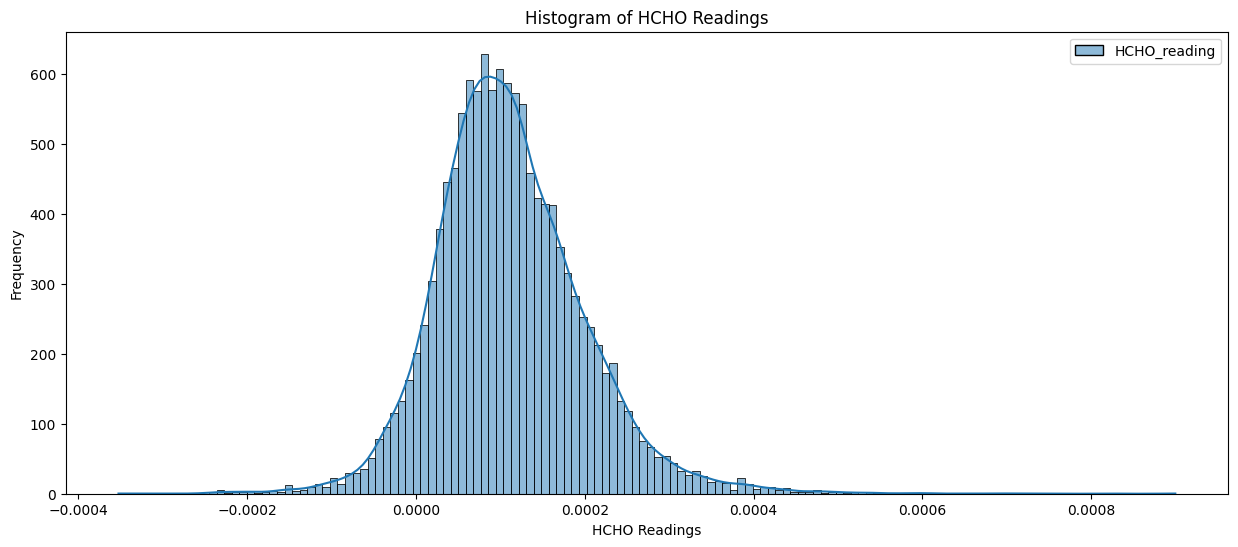

In [116]:
# Histogram for HCHO Readings

plt.figure(figsize=(15,6))
sns.histplot(data = df_sl_cities, kde=True)
plt.title('Histogram of HCHO Readings')
plt.xlabel('HCHO Readings')
plt.ylabel('Frequency')
plt.show()

### Observations
1.   Histogram for whole dataset shows a bell shaped graph
2. HCHO values are fall around  0.0001
3. Most of the readings are similar to 0.0001 value.

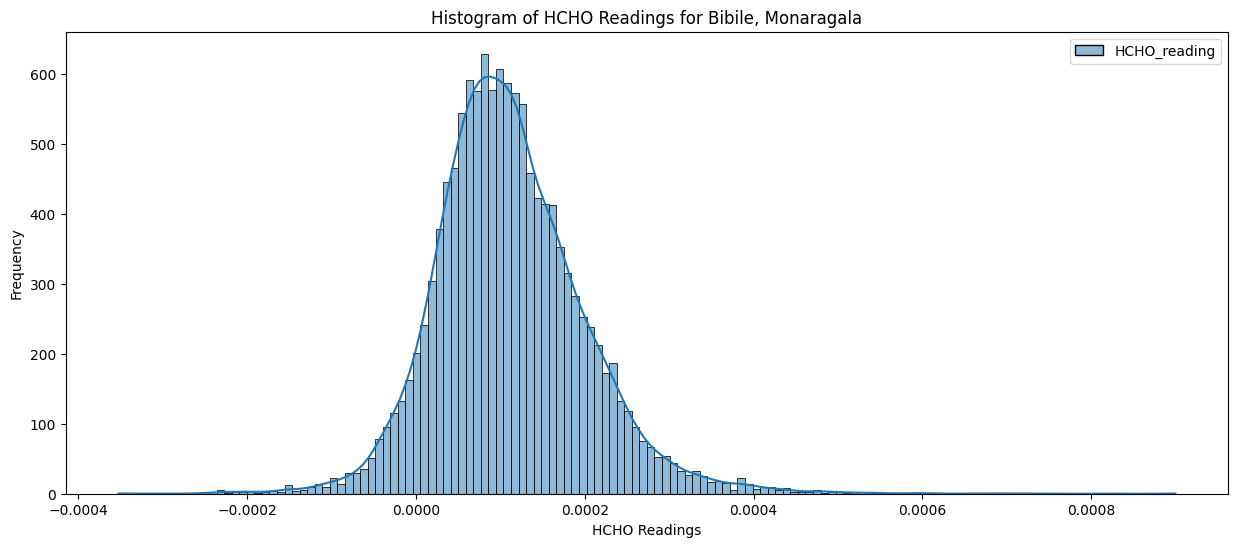

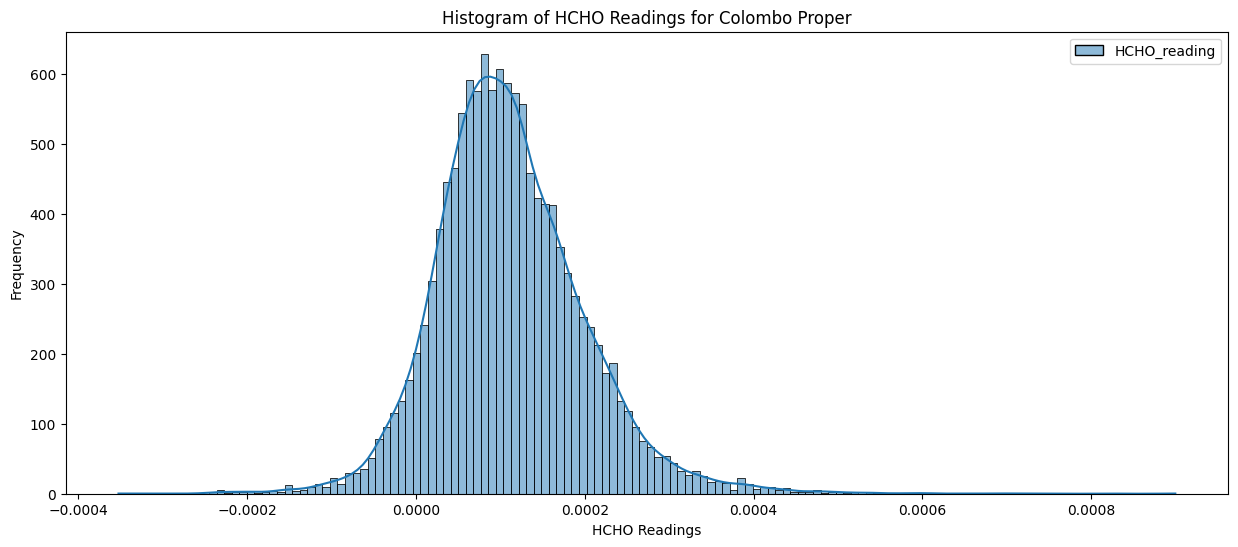

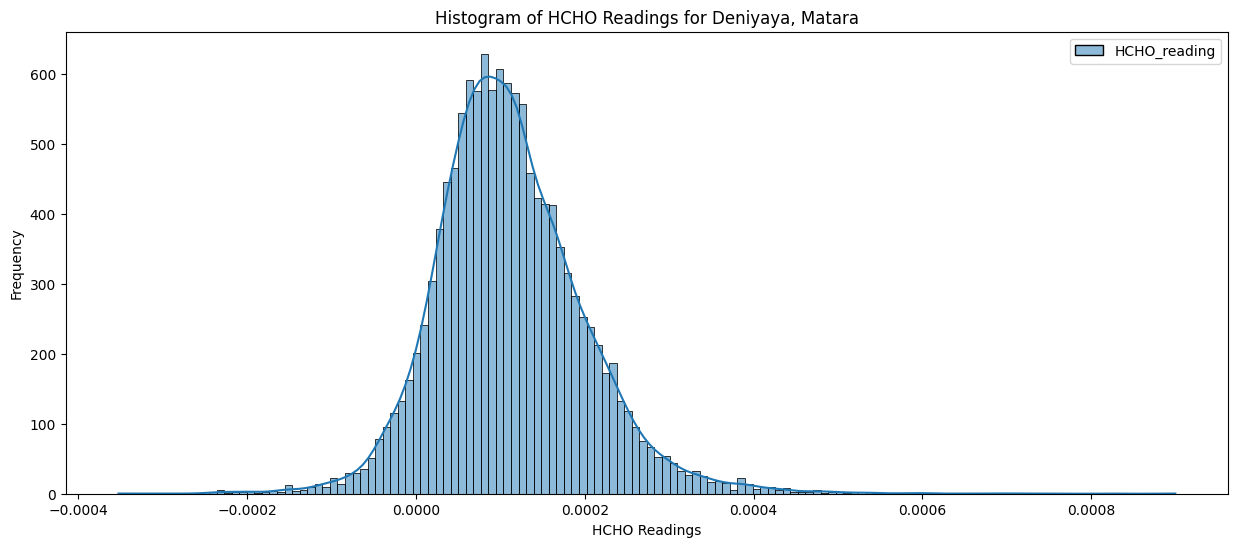

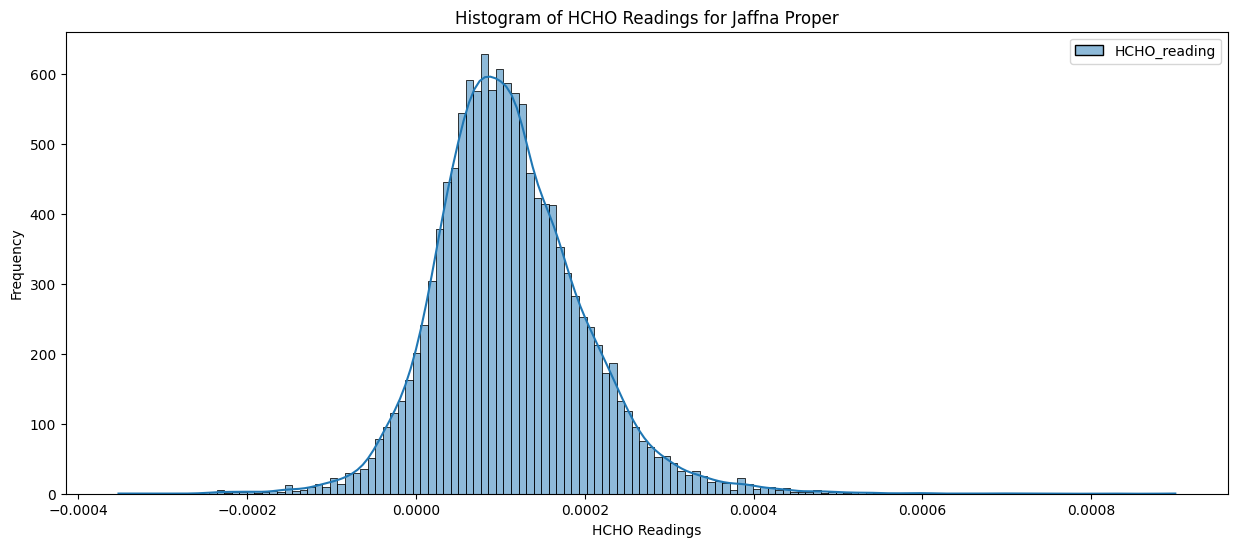

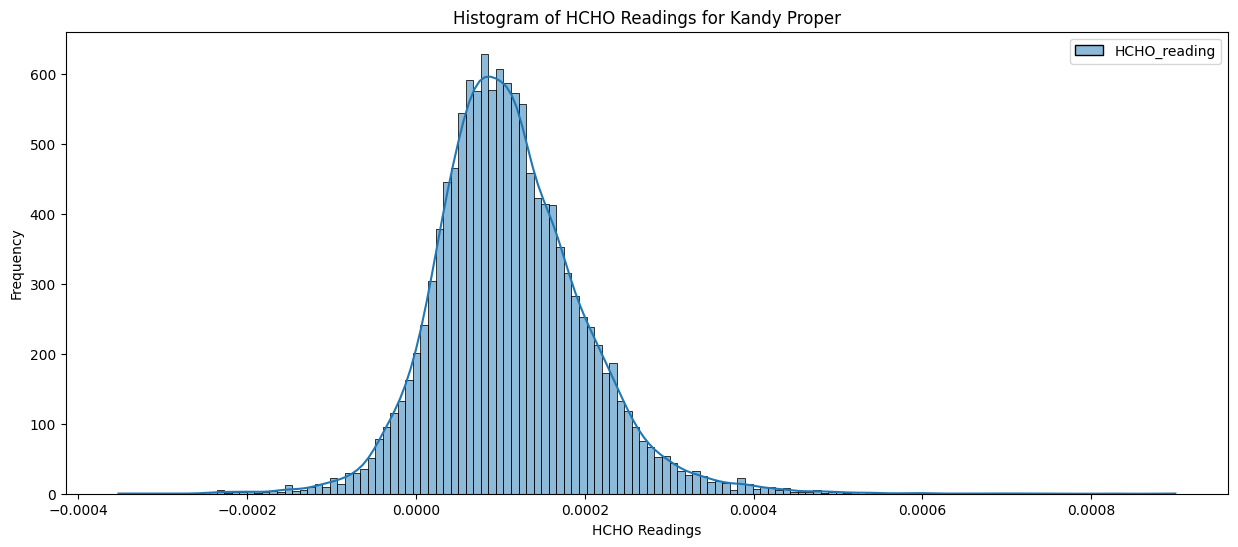

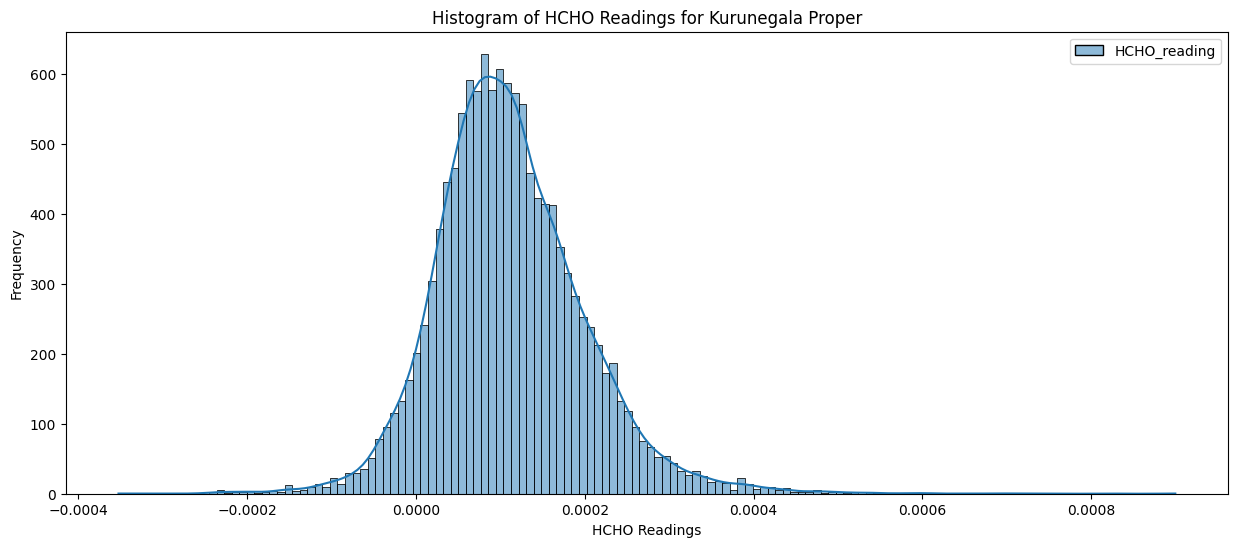

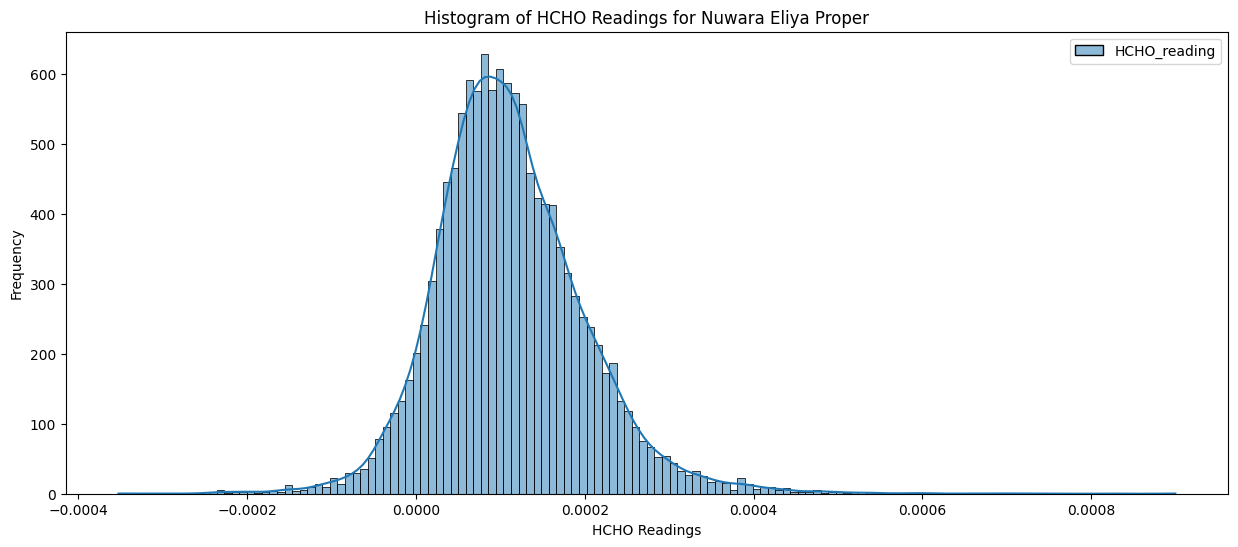

In [117]:
# Histogram of HCHO Readings for each city
for location, grouped_data in df_sl_cities_groups:

  plt.figure(figsize=(15,6))
  sns.histplot(data = df_sl_cities, kde=True)
  plt.title(f'Histogram of HCHO Readings for {location}')
  plt.xlabel('HCHO Readings')
  plt.ylabel('Frequency')
  plt.show()

### Observations
1.   Histogram for locationas shows a bell shaped graph
2. HCHO values are fall around  0.0001 and 0.0002
3. Most of the readings are similar to 0.0001 value.




### Histograms to find data imbalance


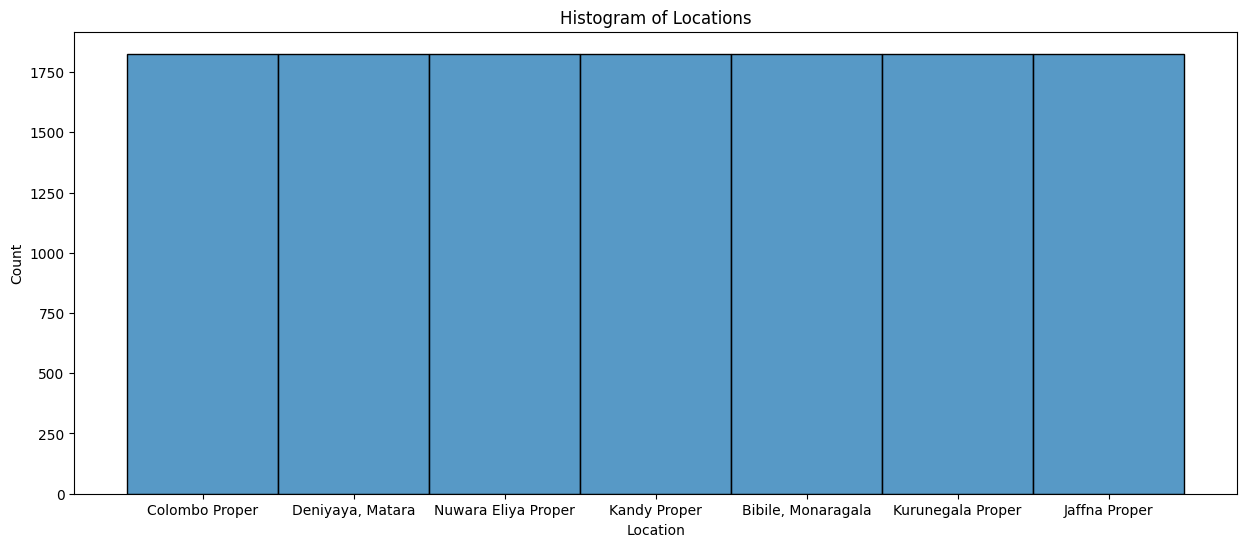

In [118]:
plt.figure(figsize=(15,6))
sns.histplot(data = df_sl_cities, x='Location' )
plt.title('Histogram of Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

### Observations
1. There are no signs of data imbalance **bold text**

### Boxplots to find outliers



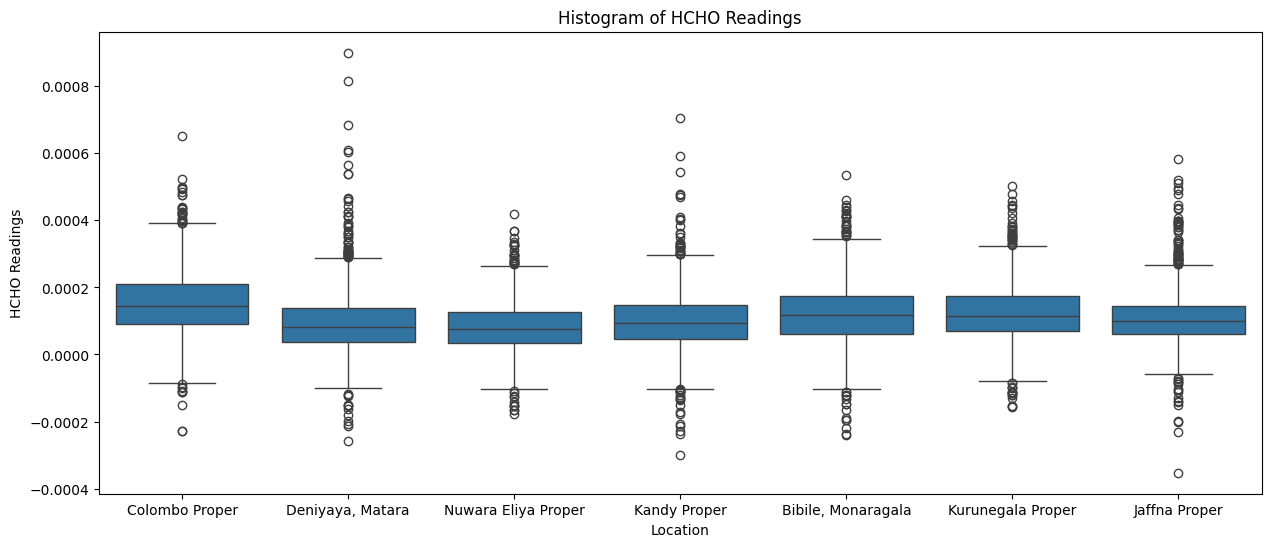

In [119]:
# Boxplots for HCHO Readings

plt.figure(figsize=(15,6))
sns.boxplot(x='Location', y='HCHO_reading', data = df_sl_cities)
plt.title('Histogram of HCHO Readings')
plt.ylabel('HCHO Readings')
plt.xlabel('Location')
plt.show()

### Observations
1. There are outliers

In [120]:
 df_sl_cities_group1 = df_sl_cities.groupby("Location")

In [121]:
Q1 = df_sl_cities_group1['HCHO_reading'].quantile(0.25)
Q3 = df_sl_cities_group1['HCHO_reading'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_sl_cities['HCHO_reading'] = df_sl_cities_group1['HCHO_reading'].transform(lambda x: x.clip(lower=lower_bound[x.name], upper=upper_bound[x.name]))
print("______________________________________________________________________")
df_sl_cities.shape

______________________________________________________________________


(12779, 4)

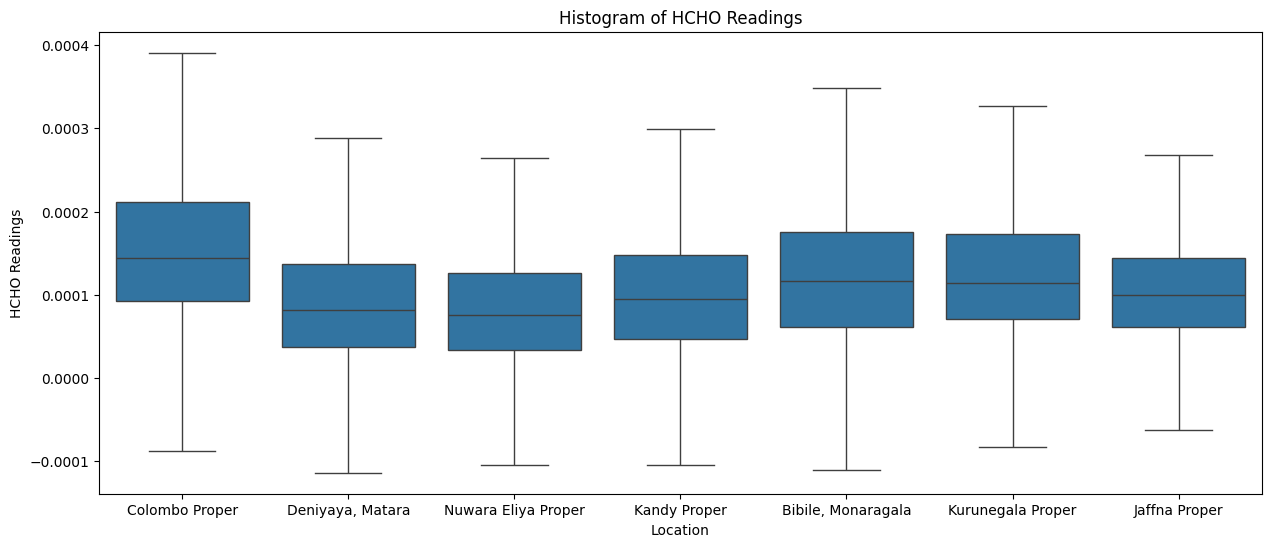

In [122]:
# Boxplots for HCHO Readings

plt.figure(figsize=(15,6))
sns.boxplot(x='Location', y='HCHO_reading', data = df_sl_cities)
plt.title('Histogram of HCHO Readings')
plt.ylabel('HCHO Readings')
plt.xlabel('Location')
plt.show()

# **3. Machine Learning**

## SARIMA Model

In [123]:
df_model = df_sl_cities.copy()
df_model.head()

,HCHO_reading,Location,Current_Date,Next_Date
0,0.000263,Colombo Proper,2019-01-02,2019-01-03
1,0.000099,Colombo Proper,2019-01-03,2019-01-04
2,0.000210,Colombo Proper,2019-01-04,2019-01-05
3,0.000179,Colombo Proper,2019-01-05,2019-01-06
4,0.000108,Colombo Proper,2019-01-06,2019-01-07


In [124]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score

strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary"

weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary

In [125]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
# Check for stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('p-value:', result[1]) # 0.05 > x  0

def plot_acf_pacf(timeseries, lags=30):
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(timeseries, ax=ax[0], lags=lags)
    plot_pacf(timeseries, ax=ax[1], lags=lags)
    plt.show()

## Colombo Proper Model Evaluation

In [126]:
df_model["Location"].unique()

array(['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
       'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper',
       'Jaffna Proper'], dtype=object)

In [127]:
df_colombo = df_model[df_model['Location'] == 'Colombo Proper']
print(df_colombo.shape)
df_colombo.head()

(1825, 4)


,HCHO_reading,Location,Current_Date,Next_Date
0,0.000263,Colombo Proper,2019-01-02,2019-01-03
1,0.000099,Colombo Proper,2019-01-03,2019-01-04
2,0.000210,Colombo Proper,2019-01-04,2019-01-05
3,0.000179,Colombo Proper,2019-01-05,2019-01-06
4,0.000108,Colombo Proper,2019-01-06,2019-01-07


In [128]:
df_colombo.drop(['Location','Next_Date'], axis=1)

,HCHO_reading,Current_Date
0,0.000263,2019-01-02
1,0.000099,2019-01-03
2,0.000210,2019-01-04
3,0.000179,2019-01-05
4,0.000108,2019-01-06
...,...,...
1820,0.000118,2023-12-27
1821,0.000125,2023-12-28
1822,0.000133,2023-12-29
1823,0.000140,2023-12-30


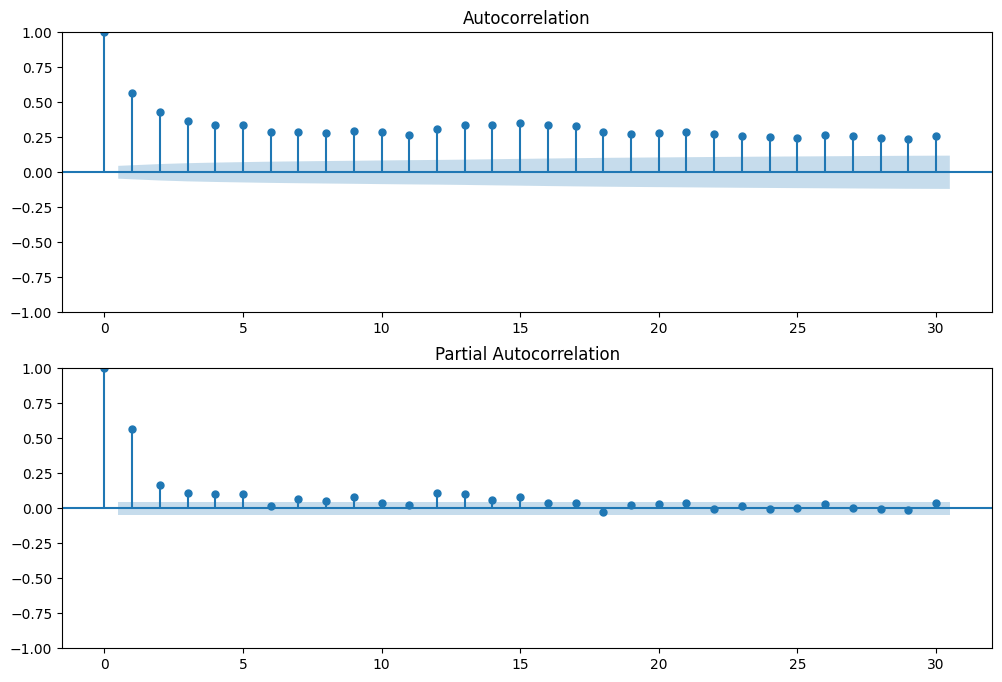

In [129]:
plot_acf_pacf(df_colombo['HCHO_reading'])

In [130]:
check_stationarity(df_colombo['HCHO_reading'])

p-value: 0.0004962513480840333


In [131]:
df_colombo['Current_Date'] = pd.to_datetime(df_colombo['Current_Date'])
df_colombo.sort_values(by='Current_Date', inplace=True)
df_colombo.set_index('Current_Date', inplace=True)

my_order = (1, 1, 0)
my_seasonal_order = (1, 1, 0, 12)
model = SARIMAX(df_colombo["HCHO_reading"][:1600], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

start_i = len(df_colombo["HCHO_reading"][:1600])
end_i = len(df_colombo["HCHO_reading"][:1600]) + len(df_colombo["HCHO_reading"][1600:]) - 1
predictions = result.predict(start=start_i, end=end_i, dynamic=False)

<ipython-input-131-c83b476914a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colombo['Current_Date'] = pd.to_datetime(df_colombo['Current_Date'])
<ipython-input-131-c83b476914a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colombo.sort_values(by='Current_Date', inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4

## Colombo Proper Model Validation

In [132]:

mse = mean_squared_error(df_colombo["HCHO_reading"][1600:], predictions)
r2 = r2_score(df_colombo["HCHO_reading"][1600:], predictions)

print('Mean Squared Error:', mse)
print("R-squared:", r2)


Mean Squared Error: 1.139447730544901e-08
R-squared: -0.9237649190521524


In [133]:
my_order = (1, 1, 0)
my_seasonal_order = (1, 1, 0, 12)
model = SARIMAX(df_colombo["HCHO_reading"], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

forecast = result.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


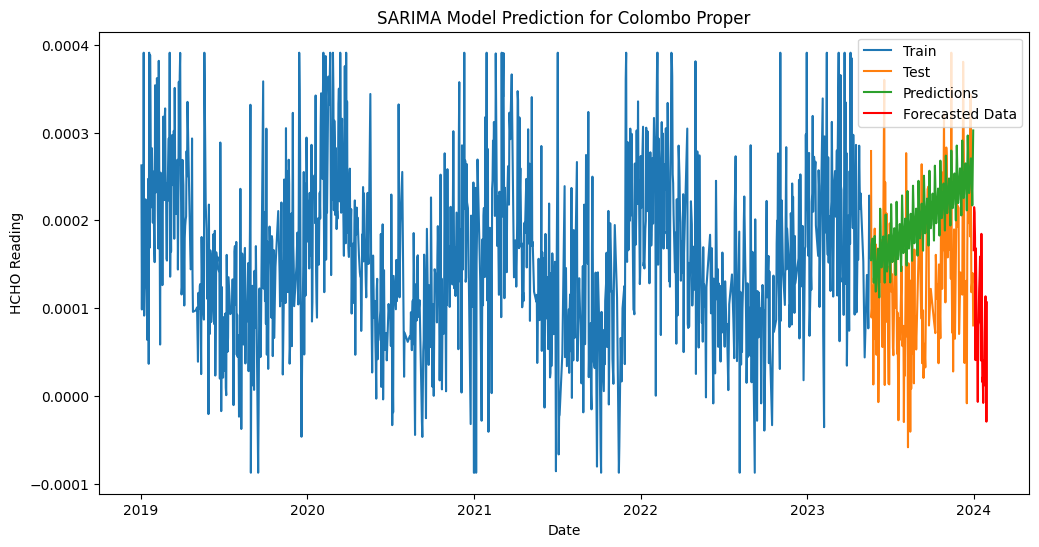

In [134]:
plt.figure(figsize=(12, 6))
plt.plot(df_colombo["HCHO_reading"][:1600].index, df_colombo["HCHO_reading"][:1600], label='Train')
plt.plot(df_colombo["HCHO_reading"][1600:].index, df_colombo["HCHO_reading"][1600:], label='Test')
plt.plot(df_colombo["HCHO_reading"][1600:].index, predictions, label='Predictions')
plt.plot(forecast, label='Forecasted Data', color='red')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Model Prediction for Colombo Proper')
plt.legend()
plt.show()

## Deniyaya, Matara Model Evaluation

In [135]:
df_model["Location"].unique()

array(['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
       'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper',
       'Jaffna Proper'], dtype=object)

In [136]:
df_den_mat = df_model[df_model['Location'] == 'Deniyaya, Matara']
print(df_den_mat.shape)
df_den_mat.head()

(1826, 4)


,HCHO_reading,Location,Current_Date,Next_Date
1825,0.000080,"Deniyaya, Matara",2019-01-01,2019-01-02
1826,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03
1827,0.000236,"Deniyaya, Matara",2019-01-03,2019-01-04
1828,0.000064,"Deniyaya, Matara",2019-01-04,2019-01-05
1829,0.000053,"Deniyaya, Matara",2019-01-05,2019-01-06


In [137]:
df_den_mat.drop(['Location','Next_Date'], axis=1)

,HCHO_reading,Current_Date
1825,0.000080,2019-01-01
1826,0.000006,2019-01-02
1827,0.000236,2019-01-03
1828,0.000064,2019-01-04
1829,0.000053,2019-01-05
...,...,...
3646,0.000228,2023-12-27
3647,0.000191,2023-12-28
3648,0.000153,2023-12-29
3649,0.000116,2023-12-30


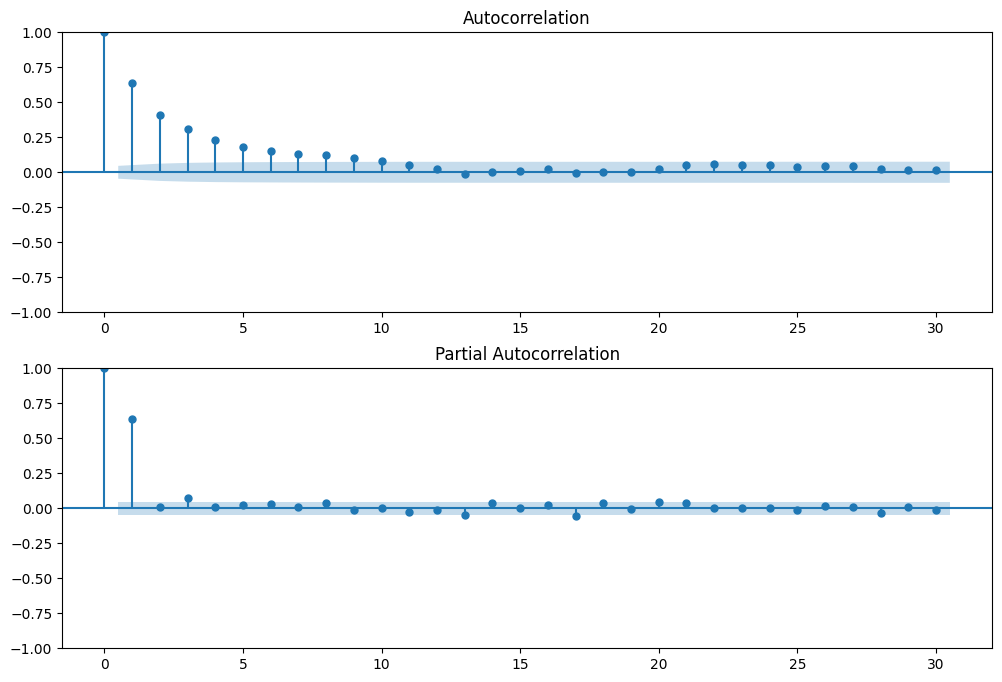

In [138]:
plot_acf_pacf(df_den_mat['HCHO_reading'])

In [139]:
check_stationarity(df_den_mat['HCHO_reading'])

p-value: 3.449685469125085e-28


In [140]:
df_den_mat['Current_Date'] = pd.to_datetime(df_den_mat['Current_Date'])
df_den_mat.sort_values(by='Current_Date', inplace=True)
df_den_mat.set_index('Current_Date', inplace=True)

my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df_den_mat["HCHO_reading"][:1600], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

start_i = len(df_den_mat["HCHO_reading"][:1600])
end_i = len(df_den_mat["HCHO_reading"][:1600]) + len(df_den_mat["HCHO_reading"][1600:]) - 1
predictions = result.predict(start=start_i, end=end_i, dynamic=False)

<ipython-input-140-e395870509c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_den_mat['Current_Date'] = pd.to_datetime(df_den_mat['Current_Date'])
<ipython-input-140-e395870509c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_den_mat.sort_values(by='Current_Date', inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4

## Deniyaya, Matara Model Validation

In [141]:

mse = mean_squared_error(df_den_mat["HCHO_reading"][1600:], predictions)
r2 = r2_score(df_den_mat["HCHO_reading"][1600:], predictions)

print('Mean Squared Error:', mse)
print("R-squared:", r2)


Mean Squared Error: 1.764692382195677e-08
R-squared: -2.484425079389889


In [142]:
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df_den_mat["HCHO_reading"], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

forecast = result.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


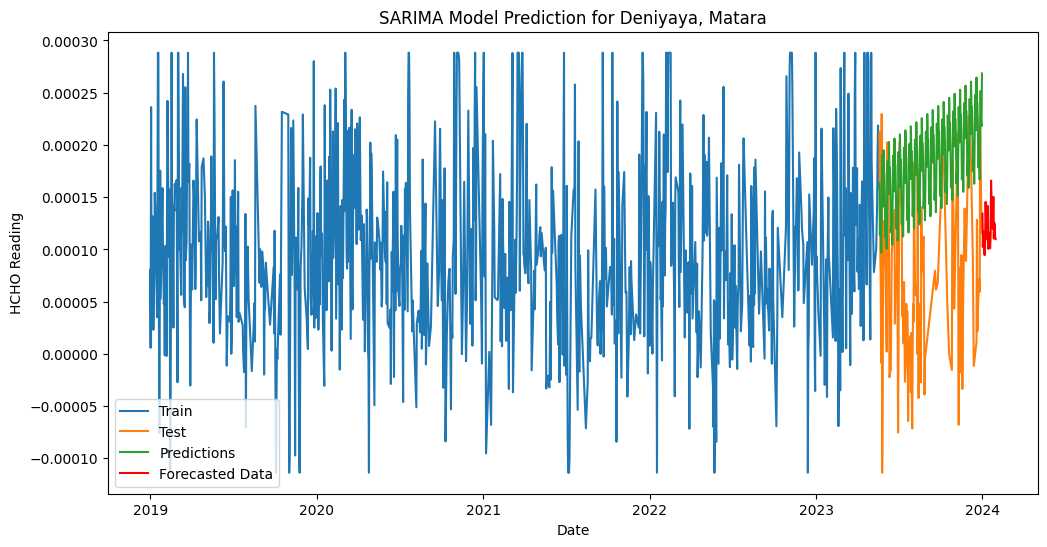

In [143]:
plt.figure(figsize=(12, 6))
plt.plot(df_den_mat["HCHO_reading"][:1600].index, df_den_mat["HCHO_reading"][:1600], label='Train')
plt.plot(df_den_mat["HCHO_reading"][1600:].index, df_den_mat["HCHO_reading"][1600:], label='Test')
plt.plot(df_den_mat["HCHO_reading"][1600:].index, predictions, label='Predictions')
plt.plot(forecast, label='Forecasted Data', color='red')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Model Prediction for Deniyaya, Matara')
plt.legend()
plt.show()


## Nuwara Eliya Proper Model Evaluation

In [144]:
df_model["Location"].unique()

array(['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
       'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper',
       'Jaffna Proper'], dtype=object)

In [145]:
df_nuw_eli = df_model[df_model['Location'] == 'Nuwara Eliya Proper']
print(df_nuw_eli.shape)
df_nuw_eli.head()

(1826, 4)


,HCHO_reading,Location,Current_Date,Next_Date
3651,0.000116,Nuwara Eliya Proper,2019-01-01,2019-01-02
3652,0.000116,Nuwara Eliya Proper,2019-01-02,2019-01-03
3653,0.000191,Nuwara Eliya Proper,2019-01-03,2019-01-04
3654,0.000051,Nuwara Eliya Proper,2019-01-04,2019-01-05
3655,0.000065,Nuwara Eliya Proper,2019-01-05,2019-01-06


In [146]:
df_nuw_eli.drop(['Location','Next_Date'], axis=1)

,HCHO_reading,Current_Date
3651,0.000116,2019-01-01
3652,0.000116,2019-01-02
3653,0.000191,2019-01-03
3654,0.000051,2019-01-04
3655,0.000065,2019-01-05
...,...,...
5472,0.000237,2023-12-27
5473,0.000237,2023-12-28
5474,0.000237,2023-12-29
5475,0.000237,2023-12-30


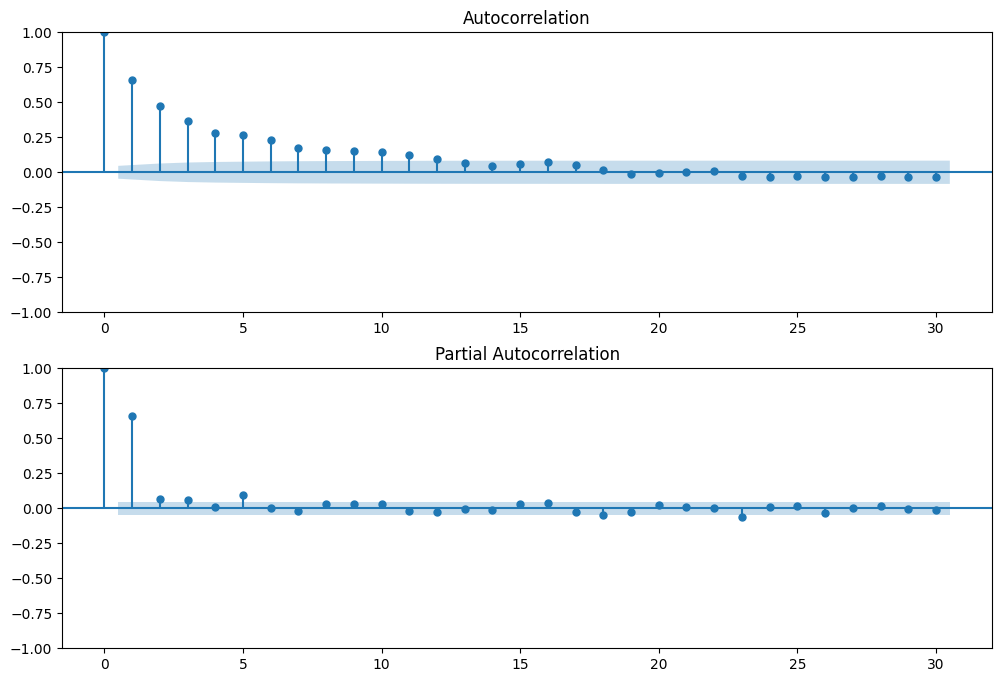

In [147]:
plot_acf_pacf(df_nuw_eli['HCHO_reading'])

In [148]:
check_stationarity(df_nuw_eli['HCHO_reading'])

p-value: 2.7594932408021642e-21


In [149]:
df_nuw_eli['Current_Date'] = pd.to_datetime(df_nuw_eli['Current_Date'])
df_nuw_eli.sort_values(by='Current_Date', inplace=True)
df_nuw_eli.set_index('Current_Date', inplace=True)

my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df_nuw_eli["HCHO_reading"][:1600], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

start_i = len(df_nuw_eli["HCHO_reading"][:1600])
end_i = len(df_nuw_eli["HCHO_reading"][:1600]) + len(df_nuw_eli["HCHO_reading"][1600:]) - 1
predictions = result.predict(start=start_i, end=end_i, dynamic=False)

<ipython-input-149-a5cc796fa605>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuw_eli['Current_Date'] = pd.to_datetime(df_nuw_eli['Current_Date'])
<ipython-input-149-a5cc796fa605>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuw_eli.sort_values(by='Current_Date', inplace=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:4

## Nuwara Eliya Proper Model Validation

In [150]:

mse = mean_squared_error(df_nuw_eli["HCHO_reading"][1600:], predictions)
r2 = r2_score(df_nuw_eli["HCHO_reading"][1600:], predictions)

print('Mean Squared Error:', mse)
print("R-squared:", r2)


Mean Squared Error: 2.7316926005143292e-08
R-squared: -2.7742397450336145


In [151]:
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df_nuw_eli["HCHO_reading"], order=my_order, seasonal_order=my_seasonal_order)
result = model.fit()

forecast = result.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


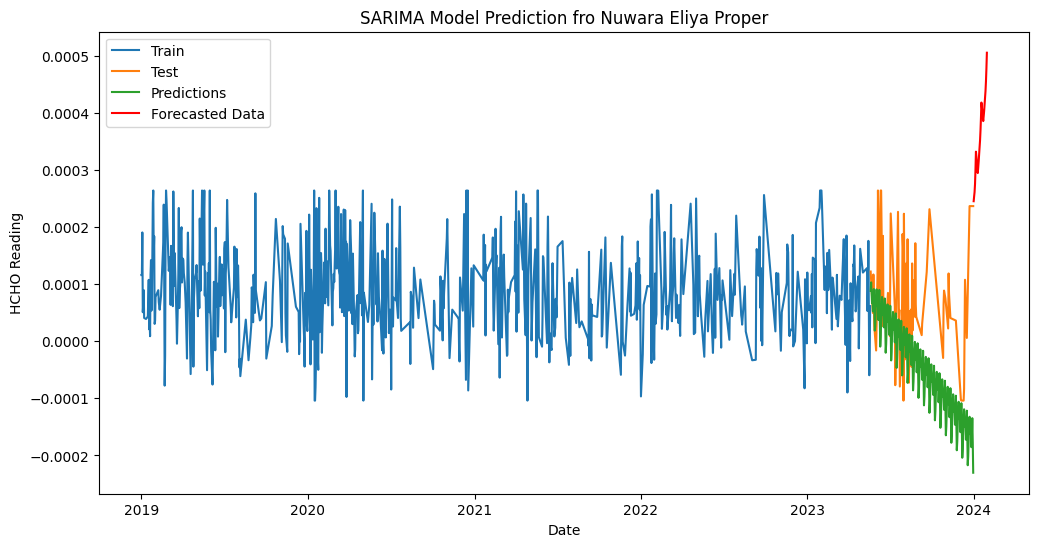

In [152]:
plt.figure(figsize=(12, 6))
plt.plot(df_nuw_eli["HCHO_reading"][:1600].index, df_nuw_eli["HCHO_reading"][:1600], label='Train')
plt.plot(df_nuw_eli["HCHO_reading"][1600:].index, df_nuw_eli["HCHO_reading"][1600:], label='Test')
plt.plot(df_nuw_eli["HCHO_reading"][1600:].index, predictions, label='Predictions')
plt.plot(forecast, label='Forecasted Data', color='red')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('SARIMA Model Prediction fro Nuwara Eliya Proper')
plt.legend()
plt.show()
